# Perceptron Lab

This is the scaffold notebook for the perceptron lab and each lab will have a similar scaffold.  Make your own copy of this notebook and then you can fill in the tasks.  **You will fill in code boxes and test boxes with discussion for most tasks** and particularly discussion of results, graphs, etc. Good writing, grammar, punctuation, etc. are important and points will be taken off if these things are lacking.

In most cases just reporting results without discussion will not receive full credit. Thus, your discussion should also include sentences like the following: This is because…  Note that the …  I was surprised to observe… I am not sure why …, but my hypothesis is that …

Start by looking over the scikit-learn [user guide](https://scikit-learn.org/stable/user_guide.html) and carefully reading over the [perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html).

In [1]:
# imports
import numpy as np
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt

## 1. Debug and Evaluation

For most labs we will give you some data and expected results so that you can verify that you are doing things right and getting appropriate results.  We will then have you run on some other data with the exact same hyperparameters so we can see if your results are correct.

### 1.1 Debug (5%)
Download this [data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/linsep2nonorigin.arff) into your local directory and name it debug.arff.  To download rather than view, right-click the link and save as.  To allow consistent results run the Perceptron using the following hyperparameters:
- Learning rate = .1
- Do NOT shuffle the data after every epoch like you would normally do
- Learn for a maximum of 10 epochs
- Start all weights at 0 (which is the default for this scikit-learn implementation)  

Your results should be:
Accuracy = [.875]\
Final Weights = [[-0.23  0.18]]\
[-0.1] - This last weight is the bias weight, which they call the intercept.

To help you with this first task, following is one detailed variation that would do this for you. You may use your own variation.  Note that commonly used variable names in the community are clf (classifier), X (array of input features), y (vector of output labels).

In [2]:
from sklearn.linear_model import Perceptron

clf = Perceptron(shuffle=False, verbose=1, eta0=.1)
Data_Set = arff.loadarff('debug.arff')
Data_Set_df = pd.DataFrame(Data_Set[0])
Data_Set_np = Data_Set_df.to_numpy()
Data_Set_np = Data_Set_np.astype(float)
X = Data_Set_np[:, :-1]
y = Data_Set_np[:, -1]
clf.fit(X, y)
print(clf.coef_)
print(clf.intercept_)
print(clf.score(X, y))

-- Epoch 1
Norm: 0.04, NNZs: 2, Bias: -0.100000, T: 8, Avg. loss: 0.013500
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.07, NNZs: 2, Bias: -0.100000, T: 16, Avg. loss: 0.011875
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.11, NNZs: 2, Bias: -0.100000, T: 24, Avg. loss: 0.010250
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.14, NNZs: 2, Bias: -0.100000, T: 32, Avg. loss: 0.008625
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.18, NNZs: 2, Bias: -0.100000, T: 40, Avg. loss: 0.007000
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.21, NNZs: 2, Bias: -0.100000, T: 48, Avg. loss: 0.005375
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.23, NNZs: 2, Bias: -0.100000, T: 56, Avg. loss: 0.008250
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.25, NNZs: 2, Bias: -0.100000, T: 64, Avg. loss: 0.007625
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.27, NNZs: 2, Bias: -0.100000, T: 72, Avg. loss: 0.007000
Total training time: 0.01 seconds.
--

Notes:
* If you increase (or just remove) max_iter your perceptron will converge to 100% in one more epoch.  Try it!
* verbose (integer) specifies how much info you get after each epoch.  It does not change results.  Try it with 0.
    * Norm is a measure of the total weight magnitudes in the current model.
    * NNZs is the number of non-zero weights there currently are (not including the bias).
    * clf.intercept_ is the value of the bias weight, NOT the actual y-intercept of the decision surface, though it will affect that.
    * T is the total number of weight updates so far.  In this case all the weights were updated each epoch.
    * Avg. loss is another measure of error.  More on that later.
    * The activation function outputs 1 if net > 0, else 0.

### 1.2 (5%) Evaluation

Now run your model  on the [evaluation dataset](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/data_banknote_authentication.arff) and report the final accuracy, weights, and bias. Use the exact same hyperparameters as the debug dataset. The most common reason for results not matching ours is not exactly using the same hyperparameters (e.g. initial weights, training exactly 10 epochs, no shuffling, etc.) Hint: Throughout these labs for the numerous cases where you are doing the same task, but with different data (e.g. debug, eval), you could create a function where you just pass the data set name, so as not to recreate the code multiple times.

In [3]:
# Load evaluation data
# Train on the evaluation data
# print your accuracy and weights. Do not enter these values by hand.

def debug_data(data_set):
  clf = Perceptron(shuffle=False, verbose=1, eta0=.1)
  Data_Set = arff.loadarff(data_set)
  Data_Set_df = pd.DataFrame(Data_Set[0])
  Data_Set_np = Data_Set_df.to_numpy()
  Data_Set_np = Data_Set_np.astype(float)
  X = Data_Set_np[:, :-1]
  y = Data_Set_np[:, -1]
  clf.fit(X, y)
  print(clf.coef_)
  print(clf.intercept_)
  print(clf.score(X, y))

debug_data('eval.arff')

-- Epoch 1
Norm: 1.42, NNZs: 4, Bias: 2.100000, T: 1372, Avg. loss: 0.023615
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.90, NNZs: 4, Bias: 2.600000, T: 2744, Avg. loss: 0.022359
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 3.62, NNZs: 4, Bias: 3.500000, T: 4116, Avg. loss: 0.028435
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 4.36, NNZs: 4, Bias: 3.700000, T: 5488, Avg. loss: 0.013195
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 4.51, NNZs: 4, Bias: 4.300000, T: 6860, Avg. loss: 0.015216
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 4.70, NNZs: 4, Bias: 4.700000, T: 8232, Avg. loss: 0.026061
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 5.40, NNZs: 4, Bias: 4.600000, T: 9604, Avg. loss: 0.018060
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 5.83, NNZs: 4, Bias: 4.800000, T: 10976, Avg. loss: 0.018378
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 5.88, NNZs: 4, Bias: 5.200000, T: 12348, Avg. loss: 0.015085
Total training time: 0.01

*Discussion - Open this box and type in your discussion.*  Note that after each exercise you will have a chance to discuss your effort and results.

The first thing I notice is that this second data set converged a little bit quicker. It only took 9 epochs. I also noticed that the Avg. Loss was about twice as big in the second data set when compared with the first dataset.

## 2. Classifying on linearly separable and non-linearly separable data

### 2.1 (5%) Create 2 datasets

- Both with 10 instances using 2 real valued inputs with 5 instances from each class.
- One data set should be linearly separable and the other not.
- Show or print your datasets

In [4]:
# Create and show the 2 datasets.
# You could do it here in Python or create arff files in your local folder with a text editor.
# Either way show your dataset here.
def show_data_set(data_set):
  Data_Set = arff.loadarff(data_set)
  Data_Set_df = pd.DataFrame(Data_Set[0])
  Data_Set_np = Data_Set_df.to_numpy()
  Data_Set_np = Data_Set_np.astype(float)
  return Data_Set_np

linearly_separable = show_data_set('linearly_separable.arff')
non_linearly_separable = show_data_set('non_linearly_separable.arff')

print(f'This is the linerarly separable data set: \n {linearly_separable}\n')
print(f'This is the non linerarly separable data set: \n {non_linearly_separable}')


This is the linerarly separable data set: 
 [[0.5 1.  1. ]
 [1.  1.5 1. ]
 [1.5 2.  1. ]
 [2.  2.5 1. ]
 [2.5 3.  1. ]
 [3.  3.5 0. ]
 [4.  4.5 0. ]
 [5.  5.5 0. ]
 [6.  6.5 0. ]
 [6.5 7.  0. ]]

This is the non linerarly separable data set: 
 [[3.5 1.2 1. ]
 [1.6 2.4 1. ]
 [5.5 2.9 1. ]
 [2.4 4.5 1. ]
 [5.  3.6 1. ]
 [3.7 3.5 0. ]
 [4.3 7.5 0. ]
 [5.8 1.5 0. ]
 [6.9 9.6 0. ]
 [6.5 7.2 0. ]]


### 2.2 (5%) Train on both sets using the scikit-learn perceptron model
- Train on each and print the results. Train until convergence (i.e. use the default max_iter by simply not specifying it).
- You may choose your other hyperparameters.

In [5]:
# Train and print results with both datasets
debug_data('linearly_separable.arff')

-- Epoch 1
Norm: 0.35, NNZs: 2, Bias: 0.000000, T: 10, Avg. loss: 0.060000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.22, NNZs: 2, Bias: 0.200000, T: 20, Avg. loss: 0.217500
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.27, NNZs: 2, Bias: 0.300000, T: 30, Avg. loss: 0.142500
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 0.54, NNZs: 2, Bias: 0.300000, T: 40, Avg. loss: 0.022500
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.49, NNZs: 2, Bias: 0.500000, T: 50, Avg. loss: 0.125000
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.54, NNZs: 2, Bias: 0.600000, T: 60, Avg. loss: 0.090000
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.59, NNZs: 2, Bias: 0.700000, T: 70, Avg. loss: 0.077500
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.57, NNZs: 2, Bias: 0.800000, T: 80, Avg. loss: 0.122500
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.40, NNZs: 2, Bias: 0.900000, T: 90, Avg. loss: 0.032500
Total training time: 0.01 seconds.
Convergenc

In [6]:
debug_data('non_linearly_separable.arff')

-- Epoch 1
Norm: 0.23, NNZs: 2, Bias: 0.000000, T: 10, Avg. loss: 0.181500
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.46, NNZs: 2, Bias: 0.000000, T: 20, Avg. loss: 0.128200
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.77, NNZs: 2, Bias: 0.000000, T: 30, Avg. loss: 0.250600
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.58, NNZs: 2, Bias: 0.100000, T: 40, Avg. loss: 0.758000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.50, NNZs: 2, Bias: 0.200000, T: 50, Avg. loss: 0.286200
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.44, NNZs: 2, Bias: 0.300000, T: 60, Avg. loss: 0.256500
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.58, NNZs: 2, Bias: 0.300000, T: 70, Avg. loss: 0.458100
Total training time: 0.00 seconds.
Convergence after 7 epochs took 0.00 seconds
[[-0.45 -0.36]]
[0.3]
0.5


*Discussion*

So I found that the non-linearly separable data set was unable to converge. Which make sense based on what we talked about in class. The Perceptron is trying to find a way to divide the data; however, because the data is not separable, the perceptron data is never going to "converge" or find that path for which it can divide the data.

### 2.3 (10%) Graph the datasets and their corresponding decision line

 - Graph each dataset
 - Use your trained perceptrons above to determine each dataset's decision line
    - We discssed how to find the slope and intercept in class and the equation is in the Perceptron slides
 - For all graphs always label the axes!
 - Following are examples of what graphs could look like

![Linearly Separable Data](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/linearly_separable.png)

![Not Linearly Separable](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/not_linearly_separable.png)

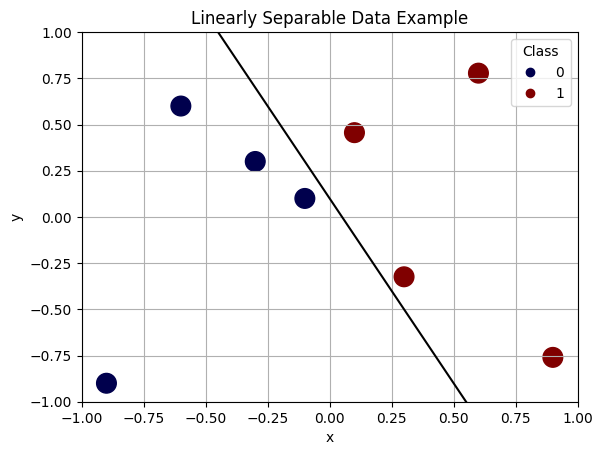

In [7]:
# Sample Graph code, You can use any graphing approach you want including this one.
# We encourage you to use matplotlib.
import matplotlib.pyplot as plt

# The data in this example is made up.  You will use your real data.
data = np.array([[-.9,-.9],[-.6,.6],[-.3,.3],[-.1,.1],[.1,.456],[.3,-.324],[.6,.778],[.9,-.76]])
labels = np.array([0,0,0,0,1,1,1,1])

# Create a scatter plot of data
plt.xlim(-1,1)
plt.ylim(-1,1)
scatter = plt.scatter(data[:,0], data[:,1], c = labels, s=200, cmap='seismic')
legend = plt.legend(*scatter.legend_elements(num=1), title="Class", loc='upper right') # Legend

# Plot the learned separator.  We just made up the slope and intercept for this example. You need to calculate
# the correct slope and intercept using your learned weights and bias.
xlist = np.linspace(-1.0, 1.0, 100) # create 100 evenly spaced points between -1 and 1 for the x axis
ylist = np.linspace(-1.0, 1.0, 100) # create 100 evenly spaced points between -1 and 1 for the y axis
slope = -2  # made up
intercept = 0.1 # made up
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )
plt.title('Linearly Separable Data Example')
plt.xlabel('x')
plt.ylabel('y')
plt.grid() # add grid lines
plt.show() # show the plot

In [8]:
def perceptron_weights_and_intercepts(data_set):
  clf = Perceptron(shuffle=False, verbose=1, eta0=.1)
  Data_Set = arff.loadarff(data_set)
  Data_Set_df = pd.DataFrame(Data_Set[0])
  Data_Set_np = Data_Set_df.to_numpy()
  Data_Set_np = Data_Set_np.astype(float)
  X = Data_Set_np[:, :-1]
  y = Data_Set_np[:, -1]
  clf.fit(X, y)
  print(clf.coef_)
  print(clf.intercept_)
  return clf

linearly_separable_clf = perceptron_weights_and_intercepts('linearly_separable.arff')
non_linearly_separable_clf = perceptron_weights_and_intercepts('non_linearly_separable.arff')

-- Epoch 1
Norm: 0.35, NNZs: 2, Bias: 0.000000, T: 10, Avg. loss: 0.060000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.22, NNZs: 2, Bias: 0.200000, T: 20, Avg. loss: 0.217500
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.27, NNZs: 2, Bias: 0.300000, T: 30, Avg. loss: 0.142500
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.54, NNZs: 2, Bias: 0.300000, T: 40, Avg. loss: 0.022500
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 0.49, NNZs: 2, Bias: 0.500000, T: 50, Avg. loss: 0.125000
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 0.54, NNZs: 2, Bias: 0.600000, T: 60, Avg. loss: 0.090000
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 0.59, NNZs: 2, Bias: 0.700000, T: 70, Avg. loss: 0.077500
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 0.57, NNZs: 2, Bias: 0.800000, T: 80, Avg. loss: 0.122500
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 0.40, NNZs: 2, Bias: 0.900000, T: 90, Avg. loss: 0.032500
Total training time: 0.01 seconds.
Convergenc

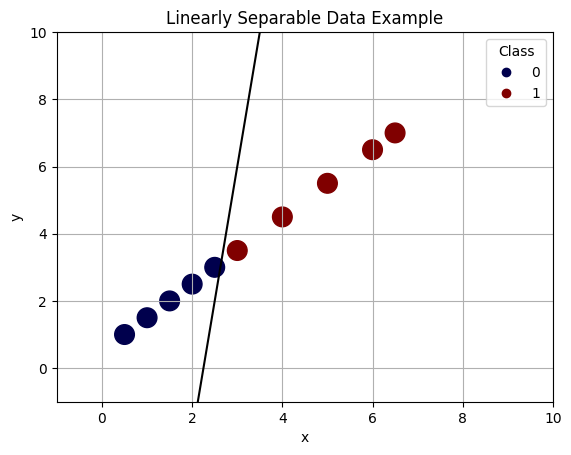

In [9]:
# We encourage you to use matplotlib.
import matplotlib.pyplot as plt

# The data in this example is made up.  You will use your real data.
data = linearly_separable
labels = np.array([0,0,0,0,0,1,1,1,1,1])

# Create a scatter plot of data
plt.xlim(-1,10)
plt.ylim(-1,10)
scatter = plt.scatter(data[:,0], data[:,1], c = labels, s=200, cmap='seismic')
legend = plt.legend(*scatter.legend_elements(num=1), title="Class", loc='upper right') # Legend

# Plot the learned separator.  We just made up the slope and intercept for this example. You need to calculate
# the correct slope and intercept using your learned weights and bias.
xlist = np.linspace(-1.0, 10.0, 100) # create 100 evenly spaced points between -1 and 10 for the x axis
ylist = np.linspace(-1.0, 10.0, 100) # create 100 evenly spaced points between -1 and 10 for the y axis
slope = -linearly_separable_clf.coef_[0, 0] / linearly_separable_clf.coef_[0, 1]
intercept = -linearly_separable_clf.intercept_ / linearly_separable_clf.coef_[0,1]
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )
plt.title('Linearly Separable Data Example')
plt.xlabel('x')
plt.ylabel('y')
plt.grid() # add grid lines
plt.show() # show the plot

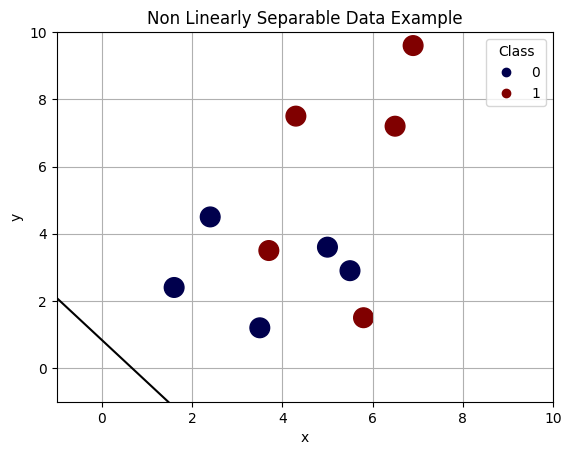

In [10]:
# We encourage you to use matplotlib.
import matplotlib.pyplot as plt

# The data in this example is made up.  You will use your real data.
data = non_linearly_separable
labels = np.array([0,0,0,0,0,1,1,1,1,1])

# Create a scatter plot of data
plt.xlim(-1,10)
plt.ylim(-1,10)
scatter = plt.scatter(data[:,0], data[:,1], c = labels, s=200, cmap='seismic')
legend = plt.legend(*scatter.legend_elements(num=1), title="Class", loc='upper right') # Legend

# Plot the learned separator.  We just made up the slope and intercept for this example. You need to calculate
# the correct slope and intercept using your learned weights and bias.
xlist = np.linspace(-1.0, 10.0, 100) # create 100 evenly spaced points between -1 and 10 for the x axis
ylist = np.linspace(-1.0, 10.0, 100) # create 100 evenly spaced points between -1 and 10 for the y axis
slope = -non_linearly_separable_clf.coef_[0, 0] / non_linearly_separable_clf.coef_[0, 1]
intercept = -non_linearly_separable_clf.intercept_ / non_linearly_separable_clf.coef_[0,1]
eq = slope*xlist + intercept
plt.plot(xlist,  eq, '-k', )
plt.title('Non Linearly Separable Data Example')
plt.xlabel('x')
plt.ylabel('y')
plt.grid() # add grid lines
plt.show() # show the plot

*Discussion*
My graph of the linearly separable data actually did a fairly good job. I think it looks a little funny because the dots on the scatter graph are so big.

My graph of the non-linearly Separable Data is horrible. The line is not even close.

### 2.4 (5%) Discuss why perceptrons in general will not get perfect accuracy on non-linearly separable data

*Discussion*

I think it all has to do with the fact that there is not a clean way to divide the data. The weights are never settle on a place where the outcome will match the data for every parameter.

## 3. Use the perceptron to learn this version of the [voting data set](https://raw.githubusercontent.com/cs472ta/CS472/master/datasets/voting-dataset.arff)

This particular task is an edited version of the standard voting set, where we have replaced all the “don’t know” values with the most common value for the particular attribute. Look at the [tutorial](https://github.com/cs472ta/CS472/blob/master/Tutorial.ipynb) from the Labs Content page to see examples of prepping the voting data set for sklearn.

### 3.1 (10%) Average final training and test set accuracy over multiple trials

- Learn the voting data five times with different random 85/15 training/test splits **each time**
- Use a learning rate of 1.  The other hyperparameters are up to you.
- Report the five trials and the **average training and test accuracy** and number of epochs to converge across the five trials in a table
    - Below is an example of what a 2 trial table might look like

| Trial | Training Accuracy | Test accuracy | Number of epochs |
| --- | --- | --- | --- |
| 1 | .950 | .550 | 4 |
| 2 | .850 | .450 | 6 |
| Average | .900 | .500 | 5 |

*- As a rough sanity check, typical Perceptron test accuracies for the voting data set are 90%-98%.*


In [11]:
# Run the perceptron 5 times on the voting data set with different splits and record the results.
# Hint: look up scikit-learn train_test_split
# Create the table using the tool of your choice
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

Data_Set = arff.loadarff('voting-dataset.arff')
Data_Set_df = pd.DataFrame(Data_Set[0])
voting_data = Data_Set_df.apply(LabelEncoder().fit_transform)
voting_np_data = voting_data.to_numpy()
voting_np_data = voting_np_data.astype(float)
X = voting_np_data[:, :-1]
y = voting_np_data[:, -1]
clf = Perceptron()

In [12]:
accuracy_avg_train = 0
accuracy_avg_test = 0
tot_epoc = 0
for i in range(5):
  X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.15, random_state = i)
  clf.fit(X_train, y_train)
  y_pred_train = clf.predict(X_train)
  y_pred_test = clf.predict(X_test)
  accuracy_train = accuracy_score(y_train, y_pred_train)
  accuracy_test = accuracy_score(y_test, y_pred_test)
  accuracy_avg_test+=accuracy_test
  accuracy_avg_train+=accuracy_train

  epoch_cntr = clf.n_iter_
  tot_epoc+=epoch_cntr

  print(f'Train Accuracy #{i+1}: {accuracy_train}')
  print(f'Test Accuracy #{i+1}: {accuracy_test}')
  print(f'Number of Epochs #{i+1}: {epoch_cntr}\n')

print(f'Train Accuracy Average: {accuracy_avg_train/5}')
print(f'Test Accuracy Average: {accuracy_avg_test/5}')
print(f'Epoch Average: {tot_epoc/5}')

Train Accuracy #1: 0.9718670076726342
Test Accuracy #1: 0.9285714285714286
Number of Epochs #1: 18

Train Accuracy #2: 0.959079283887468
Test Accuracy #2: 0.9714285714285714
Number of Epochs #2: 8

Train Accuracy #3: 0.969309462915601
Test Accuracy #3: 0.9285714285714286
Number of Epochs #3: 20

Train Accuracy #4: 0.9565217391304348
Test Accuracy #4: 0.9857142857142858
Number of Epochs #4: 11

Train Accuracy #5: 0.959079283887468
Test Accuracy #5: 0.9428571428571428
Number of Epochs #5: 14

Train Accuracy Average: 0.9631713554987213
Test Accuracy Average: 0.9514285714285714
Epoch Average: 14.2


| Trial | Training Accuracy | Test accuracy | Number of epochs |
| --- | --- | --- | --- |
| 1 | .972 | .930 | 18 |
| 2 | .959 | .971 | 8 |
| 3 | .969 | .923 | 20 |
| 4 | .957 | .986 | 11 |
| 5 | .963 | .951 | 14 |
| Average | .963 | .951 | 14.2 |

### 3.2 (10%) Interpreting the Model
- Learn with the perceptron once on the full voting data set
- Look at the learned weights and bias and do your best to explain what the model has learned and how the individual input features affect the result.
- Which specific features are most critical for the voting task, and which are least critical?

In [13]:
Data_Set_df.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa,Class
0,b'n',b'y',b'y',b'n',b'n',b'y',b'y',b'y',b'y',b'n',b'y',b'n',b'n',b'y',b'y',b'y',b'democrat'
1,b'n',b'n',b'y',b'y',b'n',b'y',b'y',b'y',b'y',b'y',b'n',b'y',b'n',b'y',b'n',b'y',b'republican'
2,b'n',b'y',b'y',b'n',b'y',b'y',b'n',b'n',b'n',b'n',b'y',b'n',b'y',b'y',b'n',b'n',b'democrat'
3,b'y',b'n',b'n',b'n',b'y',b'y',b'y',b'n',b'n',b'y',b'y',b'n',b'n',b'y',b'n',b'y',b'democrat'
4,b'y',b'y',b'y',b'y',b'y',b'y',b'n',b'n',b'y',b'n',b'y',b'n',b'y',b'y',b'n',b'n',b'democrat'


In [14]:
def debug_data_2(data_set):
  clf = Perceptron(shuffle=False, verbose=1, eta0=.1)
  Data_Set = arff.loadarff(data_set)
  Data_Set_df = pd.DataFrame(Data_Set[0])
  Data_Set_df = Data_Set_df.apply(LabelEncoder().fit_transform)
  Data_Set_np = Data_Set_df.to_numpy()
  Data_Set_np = Data_Set_np.astype(float)
  X = Data_Set_np[:, :-1]
  y = Data_Set_np[:, -1]
  clf.fit(X, y)
  print(clf.coef_)
  print(clf.intercept_)
  print(clf.score(X, y))
  return clf.fit(X,y)

data_voting = debug_data_2('voting-dataset.arff')


-- Epoch 1
Norm: 1.26, NNZs: 13, Bias: -0.200000, T: 461, Avg. loss: 0.024078
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.60, NNZs: 13, Bias: -0.400000, T: 922, Avg. loss: 0.018004
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.75, NNZs: 16, Bias: -0.600000, T: 1383, Avg. loss: 0.016920
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.96, NNZs: 15, Bias: -0.700000, T: 1844, Avg. loss: 0.020390
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.02, NNZs: 15, Bias: -0.800000, T: 2305, Avg. loss: 0.024729
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 2.10, NNZs: 14, Bias: -0.900000, T: 2766, Avg. loss: 0.020174
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 2.25, NNZs: 15, Bias: -0.900000, T: 3227, Avg. loss: 0.018438
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 2.36, NNZs: 15, Bias: -1.000000, T: 3688, Avg. loss: 0.022993
Total training time: 0.01 seconds.
Convergence after 8 epochs took 0.01 seconds
[[ 0.00000000e+00 -2.00000000e-01 -6.00000000

Discuss how the different features effect prediction

So what I understand at this point is that the values that have the highest absolute value is the measure that has highest impact on our model. So from what I can tell it looks like 'Physician Fee Freeze' has the highest impact and 'Hanicapped Infants' has the lowest impact.

### 3.3 (15%) Misclassification rate vs epochs

Learn with the perceptron once on the full voting data set and graph the misclassification rate (number_misclassified  /  number_of_total_data_points) at each epoch until convergence (0th – final epoch).  Hints:
- For the 0th epoch (i.e. initial weights), assume the initial misclassification rate is 66% and let that be the first point on your graph. Since there are 2 output classes, random guessing would only get it right about 1/2 of the time. Missclassifcation rate is 1 - accuracy.
- Doing clf.fit with max_iter = 1, and warm_start=True will let you loop through epochs one at a time, allowing you to look at accuracy, etc. after each epoch.  But how do you know how many epochs to run until convergence?  One way is to just to first run it until convergence with random_state = c to see how many epochs it took (n_iter_).  Then run it again one epoch at a time n_iter_ times using the same random_state constant c (so that you get the exact same conditions).
- Below is a rough example of what this type of graph might look like (though this graph is for avg rate across multiple trials)

![Average Misclassification Rate](https://raw.githubusercontent.com/rmorain/CS472-1/master/images/perceptron/avg_misclassification_rate_vs_epochs.png)

In [15]:
# Learn once on the full voting data set, while gathering info after every epoch
# Then Graph it here.  Here is some sample graph code, but you can do it your own way, including using a bar graph, etc.

def plot_misclassification(misclassification_rate):
    """
        Plots the misclassification rate
    Args:
        misclassification_rate (array-like): A 1D array or list of missclassifcation rate at every epoch
    """
    plt.plot(np.arange(len(misclassification_rate)), misclassification_rate)
    plt.title("Misclassification Rate vs. Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Misclassification Rate")
    plt.show()

In [16]:
def find_misclassification_rate(data_set):
  misclassification_rate = []
  Data_Set = arff.loadarff(data_set)
  Data_Set_df = pd.DataFrame(Data_Set[0])
  Data_Set_df = Data_Set_df.apply(LabelEncoder().fit_transform)
  Data_Set_np = Data_Set_df.to_numpy()
  Data_Set_np = Data_Set_np.astype(float)
  X = Data_Set_np[:, :-1]
  y = Data_Set_np[:, -1]
  misclassification_rate.append(0.66)
  for i in range(8):
    clf = Perceptron(shuffle=False, verbose=1, eta0=1, warm_start=True, max_iter=i+1)
    clf.fit(X, y)
    # y_pred = clf.predict(X)
    # rate = 1 - accuracy_score(y, y_pred)
    misclassification_rate.append(1-clf.score(X,y))
  return misclassification_rate

In [17]:
misclassification_rate = find_misclassification_rate('voting-dataset.arff')

-- Epoch 1
Norm: 13.78, NNZs: 15, Bias: -2.000000, T: 461, Avg. loss: 0.240781
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 13.78, NNZs: 15, Bias: -2.000000, T: 461, Avg. loss: 0.240781
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 17.23, NNZs: 13, Bias: -4.000000, T: 922, Avg. loss: 0.188720
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 13.78, NNZs: 15, Bias: -2.000000, T: 461, Avg. loss: 0.240781
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 17.23, NNZs: 13, Bias: -4.000000, T: 922, Avg. loss: 0.188720
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 18.84, NNZs: 13, Bias: -4.000000, T: 1383, Avg. loss: 0.162690
Total training time: 0.00 seconds.
-- Epoch 1
Norm: 13.78, NNZs: 15, Bias: -2.000000, T: 461, Avg. loss: 0.240781
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 17.23, NNZs: 13, Bias: -4.000000, T: 922, Avg. loss: 0.188720
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 18.84, NNZs: 13, Bias: -4.000000, T: 1383, Avg. loss: 0.162690
Total t

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

In [18]:
misclassification_rate

[0.66,
 0.05206073752711493,
 0.0390455531453362,
 0.04772234273318876,
 0.05422993492407813,
 0.04772234273318876,
 0.045553145336225564,
 0.03687635574837311,
 0.03253796095444683]

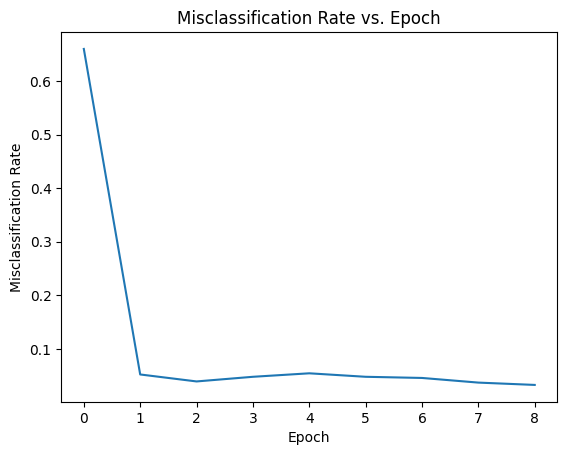

In [19]:
plot_misclassification(misclassification_rate)

*Show table and discuss*

### 3.4 (15%) Hyperparameters
Read over all the Hyperparameters and their defaults in the scikit [perceptron documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html). With the voting data set, experiment briefly with EACH of the following hyperparameters and discuss your findings.
- shuffle
- eta0 - learning rate
- fit_intercept - whether to use a bias weight or not
- random state
- warm start

In [27]:
# Run the model with different hyperparameters
# Control
def debug_data_3(data_set):
  clf = Perceptron(shuffle=False, verbose=1, eta0=.1)
  Data_Set = arff.loadarff(data_set)
  Data_Set_df = pd.DataFrame(Data_Set[0])
  Data_Set_df = Data_Set_df.apply(LabelEncoder().fit_transform)
  Data_Set_np = Data_Set_df.to_numpy()
  Data_Set_np = Data_Set_np.astype(float)
  X = Data_Set_np[:, :-1]
  y = Data_Set_np[:, -1]
  clf.fit(X, y)
  print(clf.coef_)
  print(clf.intercept_)
  print(clf.score(X, y))

debug_data_3('voting-dataset.arff')


-- Epoch 1
Norm: 1.26, NNZs: 13, Bias: -0.200000, T: 461, Avg. loss: 0.024078
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.60, NNZs: 13, Bias: -0.400000, T: 922, Avg. loss: 0.018004
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.75, NNZs: 16, Bias: -0.600000, T: 1383, Avg. loss: 0.016920
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.96, NNZs: 15, Bias: -0.700000, T: 1844, Avg. loss: 0.020390
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 2.02, NNZs: 15, Bias: -0.800000, T: 2305, Avg. loss: 0.024729
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 2.10, NNZs: 14, Bias: -0.900000, T: 2766, Avg. loss: 0.020174
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 2.25, NNZs: 15, Bias: -0.900000, T: 3227, Avg. loss: 0.018438
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 2.36, NNZs: 15, Bias: -1.000000, T: 3688, Avg. loss: 0.022993
Total training time: 0.01 seconds.
Convergence after 8 epochs took 0.01 seconds
[[ 0.00000000e+00 -2.00000000e-01 -6.00000000

In [34]:
def shuffle_data(data_set):
  clf = Perceptron(shuffle=False, verbose=1, eta0=.1)
  Data_Set = arff.loadarff(data_set)
  Data_Set_df = pd.DataFrame(Data_Set[0])
  Data_Set_df = Data_Set_df.apply(LabelEncoder().fit_transform)
  Data_Set_np = Data_Set_df.to_numpy()
  Data_Set_np = Data_Set_np.astype(float)
  X = Data_Set_np[:, :-1]
  y = Data_Set_np[:, -1]
  clf.fit(X, y)
  print(clf.coef_)
  print(clf.intercept_)
  print(clf.score(X, y))

shuffle_data('voting-dataset.arff')
#no noticiable difference for the convergence
#False takes one less epoch

-- Epoch 1
Norm: 1.26, NNZs: 13, Bias: -0.200000, T: 461, Avg. loss: 0.024078
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.60, NNZs: 13, Bias: -0.400000, T: 922, Avg. loss: 0.018004
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.75, NNZs: 16, Bias: -0.600000, T: 1383, Avg. loss: 0.016920
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.96, NNZs: 15, Bias: -0.700000, T: 1844, Avg. loss: 0.020390
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 2.02, NNZs: 15, Bias: -0.800000, T: 2305, Avg. loss: 0.024729
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 2.10, NNZs: 14, Bias: -0.900000, T: 2766, Avg. loss: 0.020174
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 2.25, NNZs: 15, Bias: -0.900000, T: 3227, Avg. loss: 0.018438
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 2.36, NNZs: 15, Bias: -1.000000, T: 3688, Avg. loss: 0.022993
Total training time: 0.01 seconds.
Convergence after 8 epochs took 0.01 seconds
[[ 0.00000000e+00 -2.00000000e-01 -6.00000000

In [37]:
def eta0_data(data_set):
  clf = Perceptron(shuffle=False, verbose=1, eta0=1)
  Data_Set = arff.loadarff(data_set)
  Data_Set_df = pd.DataFrame(Data_Set[0])
  Data_Set_df = Data_Set_df.apply(LabelEncoder().fit_transform)
  Data_Set_np = Data_Set_df.to_numpy()
  Data_Set_np = Data_Set_np.astype(float)
  X = Data_Set_np[:, :-1]
  y = Data_Set_np[:, -1]
  clf.fit(X, y)
  print(clf.coef_)
  print(clf.intercept_)
  print(clf.score(X, y))

eta0_data('voting-dataset.arff')
#a higher eta0 showed a closer convergence

-- Epoch 1
Norm: 13.78, NNZs: 15, Bias: -2.000000, T: 461, Avg. loss: 0.240781
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 17.23, NNZs: 13, Bias: -4.000000, T: 922, Avg. loss: 0.188720
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 18.84, NNZs: 13, Bias: -4.000000, T: 1383, Avg. loss: 0.162690
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 21.14, NNZs: 16, Bias: -5.000000, T: 1844, Avg. loss: 0.206074
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 23.26, NNZs: 14, Bias: -7.000000, T: 2305, Avg. loss: 0.184382
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 24.78, NNZs: 16, Bias: -8.000000, T: 2766, Avg. loss: 0.199566
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 25.44, NNZs: 15, Bias: -9.000000, T: 3227, Avg. loss: 0.210412
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 25.96, NNZs: 14, Bias: -9.000000, T: 3688, Avg. loss: 0.199566
Total training time: 0.01 seconds.
Convergence after 8 epochs took 0.01 seconds
[[ 2. -3. -7. 19.  3. -2.  1.  5. -9.

In [38]:
def fit_intercept_data(data_set):
  clf = Perceptron(shuffle=False, verbose=1, eta0=.1, fit_intercept=True)
  Data_Set = arff.loadarff(data_set)
  Data_Set_df = pd.DataFrame(Data_Set[0])
  Data_Set_df = Data_Set_df.apply(LabelEncoder().fit_transform)
  Data_Set_np = Data_Set_df.to_numpy()
  Data_Set_np = Data_Set_np.astype(float)
  X = Data_Set_np[:, :-1]
  y = Data_Set_np[:, -1]
  clf.fit(X, y)
  print(clf.coef_)
  print(clf.intercept_)
  print(clf.score(X, y))

eta0_data('voting-dataset.arff')
#No noticible difference on the convergence

-- Epoch 1
Norm: 13.78, NNZs: 15, Bias: -2.000000, T: 461, Avg. loss: 0.240781
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 17.23, NNZs: 13, Bias: -4.000000, T: 922, Avg. loss: 0.188720
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 18.84, NNZs: 13, Bias: -4.000000, T: 1383, Avg. loss: 0.162690
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 21.14, NNZs: 16, Bias: -5.000000, T: 1844, Avg. loss: 0.206074
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 23.26, NNZs: 14, Bias: -7.000000, T: 2305, Avg. loss: 0.184382
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 24.78, NNZs: 16, Bias: -8.000000, T: 2766, Avg. loss: 0.199566
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 25.44, NNZs: 15, Bias: -9.000000, T: 3227, Avg. loss: 0.210412
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 25.96, NNZs: 14, Bias: -9.000000, T: 3688, Avg. loss: 0.199566
Total training time: 0.00 seconds.
Convergence after 8 epochs took 0.00 seconds
[[ 2. -3. -7. 19.  3. -2.  1.  5. -9.

I did not see anything difference for this data set with shuffle on and off.

In [48]:
def random_state_data(data_set):
  clf = Perceptron(shuffle=False, verbose=1, eta0=.1, random_state=3)
  Data_Set = arff.loadarff(data_set)
  Data_Set_df = pd.DataFrame(Data_Set[0])
  Data_Set_df = Data_Set_df.apply(LabelEncoder().fit_transform)
  Data_Set_np = Data_Set_df.to_numpy()
  Data_Set_np = Data_Set_np.astype(float)
  X = Data_Set_np[:, :-1]
  y = Data_Set_np[:, -1]
  clf.fit(X, y)
  print(clf.coef_)
  print(clf.intercept_)
  print(clf.score(X, y))

random_state_data('voting-dataset.arff')
#0.96529284164859 - this is the convergence for 42
#0.96529284164859 - this is the convergence for 4
#0.96529284164859 - this is the convergence for 3


-- Epoch 1
Norm: 1.26, NNZs: 13, Bias: -0.200000, T: 461, Avg. loss: 0.024078
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.60, NNZs: 13, Bias: -0.400000, T: 922, Avg. loss: 0.018004
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.75, NNZs: 16, Bias: -0.600000, T: 1383, Avg. loss: 0.016920
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.96, NNZs: 15, Bias: -0.700000, T: 1844, Avg. loss: 0.020390
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 2.02, NNZs: 15, Bias: -0.800000, T: 2305, Avg. loss: 0.024729
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 2.10, NNZs: 14, Bias: -0.900000, T: 2766, Avg. loss: 0.020174
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 2.25, NNZs: 15, Bias: -0.900000, T: 3227, Avg. loss: 0.018438
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 2.36, NNZs: 15, Bias: -1.000000, T: 3688, Avg. loss: 0.022993
Total training time: 0.01 seconds.
Convergence after 8 epochs took 0.01 seconds
[[ 0.00000000e+00 -2.00000000e-01 -6.00000000

I could not get anything different from each of the random state.

In [52]:
def warm_start_data(data_set,num):
  Data_Set = arff.loadarff(data_set)
  Data_Set_df = pd.DataFrame(Data_Set[0])
  Data_Set_df = Data_Set_df.apply(LabelEncoder().fit_transform)
  Data_Set_np = Data_Set_df.to_numpy()
  Data_Set_np = Data_Set_np.astype(float)
  X = Data_Set_np[:, :-1]
  y = Data_Set_np[:, -1]
  for i in range(num):
    clf = Perceptron(shuffle=False, verbose=1, eta0=.1, warm_start=True)
    clf.fit(X, y)
  print(clf.coef_)
  print(clf.intercept_)
  print(clf.score(X, y))

warm_start_data('voting-dataset.arff',3)
#num = 1: 0.96529284164859
#num = 2: 0.96529284164859

-- Epoch 1
Norm: 1.26, NNZs: 13, Bias: -0.200000, T: 461, Avg. loss: 0.024078
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.60, NNZs: 13, Bias: -0.400000, T: 922, Avg. loss: 0.018004
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.75, NNZs: 16, Bias: -0.600000, T: 1383, Avg. loss: 0.016920
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.96, NNZs: 15, Bias: -0.700000, T: 1844, Avg. loss: 0.020390
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 2.02, NNZs: 15, Bias: -0.800000, T: 2305, Avg. loss: 0.024729
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 2.10, NNZs: 14, Bias: -0.900000, T: 2766, Avg. loss: 0.020174
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 2.25, NNZs: 15, Bias: -0.900000, T: 3227, Avg. loss: 0.018438
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 2.36, NNZs: 15, Bias: -1.000000, T: 3688, Avg. loss: 0.022993
Total training time: 0.01 seconds.
Convergence after 8 epochs took 0.01 seconds
-- Epoch 1
Norm: 1.26, NNZs: 13, Bias: -0.200

The warm start did not seem to make a huge difference over three iterations. They have the same covergence, bias, and epochs.



```
# This is formatted as code
```

Discussion: I gave the discussion after every model

## 4 (15%) Use the perceptron to learn one other data set of your choice.  
- The UC Irvine Data Repository is one great source, but you may get your data set from wherever you like, though it should be a real world task.
- Report your results

In [54]:
# Load and Train on your dataset and report results
def my_own_data(data_set):
  Data_Set_df = pd.read_csv(data_set)
  Data_Set_df = pd.DataFrame(Data_Set[0])
  Data_Set_df = Data_Set_df.apply(LabelEncoder().fit_transform)
  Data_Set_np = Data_Set_df.to_numpy()
  Data_Set_np = Data_Set_np.astype(float)
  X = Data_Set_np[:, :-1]
  y = Data_Set_np[:, -1]
  clf = Perceptron(shuffle=False, verbose=1, eta0=.1, random_state=42)
  clf.fit(X, y)
  print(clf.coef_)
  print(clf.intercept_)
  print(clf.score(X, y))

my_own_data('adult.csv')

-- Epoch 1
Norm: 1.26, NNZs: 13, Bias: -0.200000, T: 461, Avg. loss: 0.024078
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.60, NNZs: 13, Bias: -0.400000, T: 922, Avg. loss: 0.018004
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.75, NNZs: 16, Bias: -0.600000, T: 1383, Avg. loss: 0.016920
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 1.96, NNZs: 15, Bias: -0.700000, T: 1844, Avg. loss: 0.020390
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 2.02, NNZs: 15, Bias: -0.800000, T: 2305, Avg. loss: 0.024729
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 2.10, NNZs: 14, Bias: -0.900000, T: 2766, Avg. loss: 0.020174
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 2.25, NNZs: 15, Bias: -0.900000, T: 3227, Avg. loss: 0.018438
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 2.36, NNZs: 15, Bias: -1.000000, T: 3688, Avg. loss: 0.022993
Total training time: 0.01 seconds.
Convergence after 8 epochs took 0.01 seconds
[[ 0.00000000e+00 -2.00000000e-01 -6.00000000

*Discuss how the perceptron did on the data set and why you think it performed as such.*

The model did really well. I think it did as well because honestly it was a filtered dataset. The data has a lot of correlated features. It was able converge pretty quickly in only 8 epochs

## 5. (Optional 15% extra credit) Code up your own perceptron learner

Past versions of this class required students to code up their own version of each model and then compare results with scikit-learn.  Actually coding a model leads to better understanding of what is really happening "under the hood."  Though not required for this class, we give a significant extra credit reward for each lab to those who choose to code their own models.  If you choose to do this, your code must be your own, and NOT taken from any other source (including the text).  Once you are done coding we encourage you to look at other versions to see how yours compares.  Below is a scaffold you could use if you want. Requirements for this task:
- Your perceptron should support the methods shown in the example scaffold below.
- Your output node should output 1 if net is > 0, else 0.
- Use Stochastic/On-line training updates: Iterate and update weights after each training instance (i.e. not batch updates)
- Implement a stopping criteria: when your model has trained for a number of epochs with no improvement in accuracy, stop training. Note that the weights/accuracy do not usually change monotonically.
- Your class can inherit from the relevant scikit-learn learners (e.g. data shuffling, etc.), but don't call any of the super methods to accomplish the core methods in the scaffold.
- Run the evaluation data set and the voting data set above with your Perceptron version. Show and discuss your results and how they compare with the scikit-learn version.

In [ ]:
# Your Perceptron Code

*Discussion*

In [ ]:
# Optional scaffold for Extra Credit Perceptron code.  IF you use this feel free to change/add any methods you want.

from sklearn.base import BaseEstimator, ClassifierMixin
class PerceptronClassifier(BaseEstimator,ClassifierMixin):

    def __init__(self, lr=.1, shuffle=True):
        """
            Initialize class with chosen hyperparameters.
        Args:
            lr (float): A learning rate / step size.
            shuffle: Whether to shuffle the training data each epoch. DO NOT
            SHUFFLE for evaluation / debug datasets.
        """
        self.lr = lr
        self.shuffle = shuffle

    def fit(self, X, y, initial_weights=None):
        """
            Fit the data; run the algorithm and adjust the weights to find a
            good solution
        Args:
            X (array-like): A 2D numpy array with the training data, excluding
            targets
            y (array-like): A 2D numpy array with the training targets
            initial_weights (array-like): allows the user to provide initial
            weights
        Returns:
            self: this allows this to be chained, e.g. model.fit(X,y).predict(X_test)
        """
        self.weights = self.initialize_weights() if not initial_weights else initial_weights

        return self

    def predict(self, X):
        """
            Predict all classes for a dataset X
        Args:
            X (array-like): A 2D numpy array with the training data, excluding
            targets
        Returns:
            array, shape (n_samples,)
                Predicted target values per element in X.
        """
        pass

    def initialize_weights(self):
        """ Initialize weights for perceptron. Don't forget the bias!
        Returns:
        """

        return [0]

    def score(self, X, y):
        """
            Return accuracy of model on a given dataset. Must implement own
            score function.
        Args:
            X (array-like): A 2D numpy array with data, excluding targets
            y (array-like): A 2D numpy array with targets
        Returns:
            score : float
                Mean accuracy of self.predict(X) wrt. y.
        """

        return 0

    ### Returns the weights and bias. Not required but great for debugging.
    def get_weights(self):
        pass